# Notebook on Predicting Amsterdam Airbnb listing price

Opinions are my own.

This notebook has served as a playing ground for me to explore the Airbnb Amsterdam data and try to predict listing prices through several different methods, including:

* Linear Regression
* Random Forrest Regression
* OLS
* H2O Auto ML


## Getting up and running
Import all the libaries

In [1]:
# Import all the necessary libraries 

# commonly used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# visualization library
import seaborn as sns

# data manipulation utility libraries
import distutils
import datetime
import re

# sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# stats library
from scipy import stats
from scipy.stats import boxcox




In [2]:
# Import the data
df = pd.read_csv('../hw-3/train.csv')

# Data exploration

In [3]:
#Look at top rows of dataframe
df.head()


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,square_feet,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
0,127860,Double bedroom in cottage Twickenham (sleeps 1-2),"One gorgeous, light-filled double bedroom (sle...","A beautiful, light-filled double bedroom is ou...","One gorgeous, light-filled double bedroom (sle...",none,"Very, very safe area, great transport links an...",We have a super-gorgeous cat,Twickenham Rugby Stadium is 15 mins walk Water...,"You'll have full use of the cottage, two recep...",...,NaN,300.0,10.0,1,10.0,2,strict_14_with_grace_period,f,f,1000.0
1,325809,Big House for Olympics sleeps 6 to8,NaN,"A beautiful, modern, art-filled and clean 4 st...","A beautiful, modern, art-filled and clean 4 st...",none,NaN,NaN,NaN,NaN,...,1400.0,771.0,NaN,1,0.0,14,strict_14_with_grace_period,f,f,771.0
2,429045,The Old Coach House (Olympics),NaN,"Fabulous, recently refurbished original Victor...","Fabulous, recently refurbished original Victor...",none,NaN,NaN,NaN,NaN,...,1800.0,600.0,NaN,1,0.0,14,strict_14_with_grace_period,f,f,1500.0
3,473637,Brand New contemporary mews house,NaN,Stunning contemporary mews available for let o...,Stunning contemporary mews available for let o...,none,NaN,NaN,NaN,NaN,...,2100.0,300.0,100.0,7,100.0,14,strict_14_with_grace_period,f,f,2000.0
4,533943,LUXURY APT. NEAR BUCKINGHAM PALACE,“The area around Westminster Cathedral has lon...,"This stunning, spacious, 4 bedroom, top floor ...",“The area around Westminster Cathedral has lon...,family,The proximity of all of London's main attracti...,NaN,"Only 5 minutes walk to Victoria Station, the m...",NaN,...,2220.0,2505.0,180.0,1,0.0,14,strict_14_with_grace_period,f,t,901.0


In [4]:
#Quick summary of dataframe
df.describe()


,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,price
count,5.181500e+04,5.181500e+04,51815.000000,51815.000000,51815.000000,51812.000000,51796.000000,51743.000000,15.000000,33897.000000,38364.000000,51815.000000,51815.000000,51815.000000,51815.000000
mean,2.238119e+07,8.122630e+07,51.509058,-0.127937,3.225089,1.294227,1.399027,1.773438,991.133333,192.249019,42.472891,1.561401,7.052359,3.959548,115.015787
std,4.648209e+06,6.712667e+07,0.045575,0.092781,2.002458,0.620269,0.907317,1.224066,933.178965,310.090851,44.525508,1.282639,13.353841,13.994390,201.599587
min,1.278600e+05,4.775000e+03,51.294794,-0.501305,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.874920e+07,2.049720e+07,51.486162,-0.187733,2.000000,1.000000,1.000000,1.000000,242.000000,0.000000,15.000000,1.000000,0.000000,1.000000,45.000000
50%,2.235012e+07,6.358767e+07,51.513346,-0.126478,2.000000,1.000000,1.000000,1.000000,753.000000,100.000000,30.000000,1.000000,0.000000,2.000000,80.000000
75%,2.655883e+07,1.362233e+08,51.535516,-0.070239,4.000000,1.500000,2.000000,2.000000,1600.000000,250.000000,60.000000,2.000000,10.000000,3.000000,135.000000
max,2.979850e+07,2.241824e+08,51.679199,0.285395,20.000000,14.000000,12.000000,16.000000,3000.000000,4098.000000,614.000000,30.000000,235.000000,1125.000000,13700.000000


In [5]:
#number of rows and columns
df.shape


(51815, 43)

In [6]:
#sum of NaN values in price column
np.sum(df.price.notnull())

51815

In [7]:
# price column
df.price

0        1000.0
1         771.0
2        1500.0
3        2000.0
4         901.0
          ...  
51810      68.0
51811     349.0
51812     100.0
51813      69.0
51814     100.0
Name: price, Length: 51815, dtype: float64

In [8]:
# check out all columns with numeric values
num_vars = df.select_dtypes(include=['float', 'int']).columns
num_vars

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'square_feet',
       'security_deposit', 'cleaning_fee', 'extra_people', 'price'],
      dtype='object')

In [9]:
# check out all columns with categorical values
num_cat = df.select_dtypes(include=['object']).columns

num_cat

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_since', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [11]:
#check values in different neighbourhood columns
df[['neighborhood_overview','neighbourhood_cleansed']]

,neighborhood_overview,neighbourhood_cleansed
0,"Very, very safe area, great transport links an...",Richmond upon Thames
1,NaN,Camden
2,NaN,Lewisham
3,NaN,Kensington and Chelsea
4,The proximity of all of London's main attracti...,Westminster
...,...,...
51810,NaN,Merton
51811,NaN,Southwark
51812,NaN,Croydon
51813,"A lot of greenery around this property, great ...",Hounslow


In [12]:
# see ratio of categorical values 
df.neighbourhood_cleansed.value_counts() / df.shape[0]

Westminster               0.117611
Tower Hamlets             0.102171
Kensington and Chelsea    0.074689
Camden                    0.070810
Hackney                   0.066390
Southwark                 0.058902
Islington                 0.057763
Lambeth                   0.054444
Hammersmith and Fulham    0.050449
Wandsworth                0.049870
Brent                     0.029142
Lewisham                  0.026460
Newham                    0.024819
Haringey                  0.024201
Greenwich                 0.020785
Ealing                    0.020515
Barnet                    0.018856
Merton                    0.016289
Waltham Forest            0.015362
Croydon                   0.014243
Richmond upon Thames      0.012004
Hounslow                  0.011850
Redbridge                 0.008183
Hillingdon                0.008067
Bromley                   0.007295
Enfield                   0.007102
City of London            0.006967
Kingston upon Thames      0.005713
Harrow              

# **Data Preparation**

* Dropping many columns
* Cleaning some data quality issues
* Cutting outliers based on mod-z
* Create dummy variables

In [28]:
# drop columns that are irelevant 
df_clean = df.drop(['id', 'host_id', 'latitude','longitude',  
              'name', 'summary', 'space',
              'description', 'experiences_offered', 'neighborhood_overview', 'notes',
              'transit', 'access', 'interaction', 'house_rules',
              'host_about', 'zipcode', 'security_deposit', 'cleaning_fee',
              'extra_people',
              'guests_included','host_response_time','host_response_rate', 'square_feet'
             ], axis=1)



# #Drop all NaN values 

In [29]:
# drop all NaN values
df_clean = df_clean.dropna()

## Get rid of string items in Price column

In [30]:
# use string.replace to get rid of string items in price column
df_clean = df_clean.assign(price=df_clean['price'])

#Set price as float type
df_clean['price'] = df_clean['price'].astype(float)

## Get boolean expression from 'f'& 't' string

In [31]:
from distutils.util import strtobool

In [32]:
# use lambda and distutils to go from string to boolean expression
df_clean = df_clean.assign(host_is_superhost=df_clean['host_is_superhost'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(host_has_profile_pic=df_clean['host_has_profile_pic'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(host_identity_verified=df_clean['host_identity_verified'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(is_location_exact=df_clean['is_location_exact'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(require_guest_profile_picture=df_clean['require_guest_profile_picture'].apply(lambda x: bool(distutils.util.strtobool(x))))
df_clean = df_clean.assign(require_guest_phone_verification=df_clean['require_guest_phone_verification'].apply(lambda x: bool(distutils.util.strtobool(x))))


## Identify usefull amenities

In [33]:
# find amenity availability by amenity
df_clean = df_clean.assign(has_tv=df_clean['amenities'].apply(lambda x: x.find('Wifi') != -1))
df_clean = df_clean.assign(has_fireplace=df_clean['amenities'].apply(lambda x: x.find('Indoor fireplace') != -1))
df_clean = df_clean.assign(has_kitchen=df_clean['amenities'].apply(lambda x: x.find('Kitchen') != -1))
df_clean = df_clean.assign(has_family_friendly=df_clean['amenities'].apply(lambda x: x.find('Family/kid friendly') != -1))
df_clean = df_clean.assign(has_host_greeting=df_clean['amenities'].apply(lambda x: x.find('Host greets you') != -1))
df_clean = df_clean.assign(has_24hrs_checkin=df_clean['amenities'].apply(lambda x: x.find('24-hour check-in') != -1))
df_clean = df_clean.assign(has_breakfast=df_clean['amenities'].apply(lambda x: x.find('Breakfast') != -1))
df_clean = df_clean.assign(has_pets=df_clean['amenities'].apply(lambda x: x.find('Pets live on this property') != -1))
df_clean = df_clean.assign(has_dishwasher=df_clean['amenities'].apply(lambda x: x.find('Dishwasher') != -1))
df_clean = df_clean.assign(has_private_entrance=df_clean['amenities'].apply(lambda x: x.find('Private entrance') != -1))
df_clean = df_clean.assign(has_patio_balcony=df_clean['amenities'].apply(lambda x: x.find('Patio or balcony') != -1))
df_clean = df_clean.assign(has_self_checkin=df_clean['amenities'].apply(lambda x: x.find('Self check-in') != -1))
df_clean = df_clean.assign(has_workspace=df_clean['amenities'].apply(lambda x: x.find('Laptop friendly workspace') != -1))
df_clean = df_clean.assign(has_bathtub=df_clean['amenities'].apply(lambda x: x.find('Bathtub') != -1))
df_clean = df_clean.assign(has_longterm=df_clean['amenities'].apply(lambda x: x.find('Long term stays allowed') != -1))
df_clean = df_clean.assign(has_parking=df_clean['amenities'].apply(lambda x: x.find('Free parking on premises') != -1))
df_clean = df_clean.assign(has_garden=df_clean['amenities'].apply(lambda x: x.find('Garden or backyard') != -1))

# drop amenities column
df_clean = df_clean.drop(['amenities'],axis=1)

## Use datetime calculation to get days metric for Host Since

In [34]:
# create days delta calculation function
day_calc = lambda x: (datetime.date.today() - datetime.datetime.strptime(x, "%Y-%m-%d").date()).days

# apply on host_since column
df_clean = df_clean.assign(host_since=df_clean['host_since'].apply(day_calc))

## Drop some more columns

## Check outliers

In [36]:
# max price
df_clean.price.max()

13700.0

In [38]:
# ratio of occurrences of value by certain column
df_clean.minimum_nights.value_counts() / df_clean.shape[0]
    

1      0.336060
2      0.306671
3      0.166454
5      0.048337
4      0.045244
         ...   
78     0.000019
46     0.000019
365    0.000019
77     0.000019
64     0.000019
Name: minimum_nights, Length: 96, dtype: float64

<AxesSubplot:xlabel='price'>

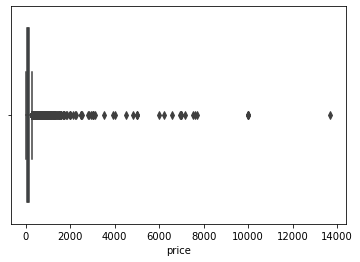

In [39]:
# check boxplot for price
sns.boxplot(x=df_clean['price'])


## Cut outliers for Price using Mod-z 

In [40]:
# create mod_z function (copied from: https://stackoverflow.com/questions/58127935/how-to-calculate-modified-z-score-and-iqr-on-each-column-of-the-dataframe)
def mod_z(col: pd.Series, thresh: float=3.5) -> pd.Series:
    med_col = col.median()
    med_abs_dev = (np.abs(col - med_col)).median()
    mod_z = 0.7413 * ((col - med_col) / med_abs_dev)
    mod_z = mod_z[np.abs(mod_z) < thresh]
    return np.abs(mod_z)

# run mod_z function on dataframe
df_mod_z = df_clean.select_dtypes(include=[np.number]).apply(mod_z)

In [41]:
#Apply above function to price 
df_clean_filtered = df_clean[df_mod_z['price'] >= 0]
df_clean_filtered = df_clean_filtered[df_clean_filtered['price'] > 0]

#check shape
df_clean_filtered.shape

(48531, 35)

In [42]:
# check summary
df_clean_filtered.describe()

,host_since,accommodates,bathrooms,bedrooms,beds,minimum_nights,price
count,48531.000000,48531.000000,48531.000000,48531.000000,48531.000000,48531.000000,48531.000000
mean,1822.162515,3.032041,1.233727,1.310997,1.669160,3.892275,89.531310
std,693.322695,1.778638,0.533589,0.796178,1.085221,14.006890,56.125287
min,763.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1265.000000,2.000000,1.000000,1.000000,1.000000,1.000000,45.000000
50%,1721.000000,2.000000,1.000000,1.000000,1.000000,2.000000,78.000000
75%,2293.000000,4.000000,1.000000,2.000000,2.000000,3.000000,120.000000
max,4386.000000,16.000000,14.000000,10.000000,16.000000,1125.000000,268.000000


## Cut outliers with hardcoded parameter

In [43]:
#Cut outliers
df_clean_filtered = df_clean_filtered[df_clean_filtered['bathrooms'] < 20]
df_clean_filtered = df_clean_filtered[df_clean_filtered['beds'] < 20]
df_clean_filtered = df_clean_filtered[df_clean_filtered['minimum_nights'] < 365]
df_clean_filtered = df_clean_filtered[df_clean_filtered['price'] < 2000]
#Check shape
df_clean_filtered.shape

(48524, 35)

Drop a few final columns


# Create dummy variables


## Check normal distribution of Response variable

C:\Users\do6pb\anaconda3\envs\ML\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

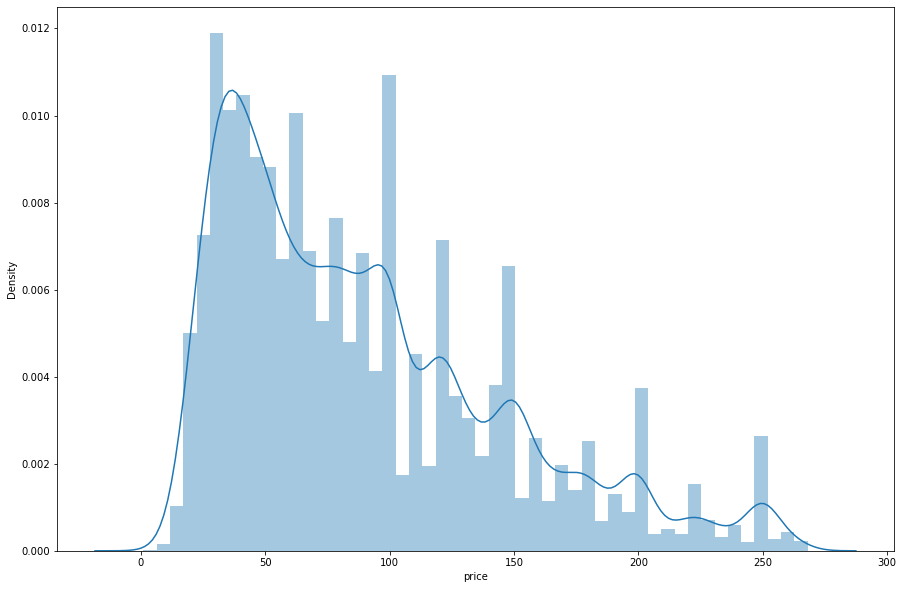

In [50]:
#plot distribution of Price
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_clean_filtered['price'])

# Preprocessing

* Normalize some columns to combine them
* Transform some data to create normal distribution of input variables
* Standardization using StandardScaler

## Normalize and combine 

In [51]:
#Import Normalizer from sklearn
from sklearn.preprocessing import Normalizer 

#Set variables to normalize
norm_vars = ['beds','bedrooms','accommodates']

# initiate normalizer and apply to scaled data array
normalize = Normalizer().fit(df_clean_filtered[norm_vars])
norm_array = normalize.transform(df_clean_filtered[norm_vars])

# create a DataFrame from the array
df_model_norm_vars = pd.DataFrame(norm_array, columns = norm_vars, index = df_clean_filtered.index)

# merge new DataFrame with full dataframe model 
df_model_merged = pd.merge(df_model_norm_vars,df_clean_filtered.drop(norm_vars,axis=1), right_index=True, left_index=True)

# create combined column for beds, bedrooms and acommodates
df_model_merged['combine_beds_bedrooms_acommodates'] = df_model_merged['beds'] + df_model_merged['bedrooms'] + df['accommodates']

# drop already combined variables
df_model_merged = df_model_merged.drop(['beds','bedrooms','accommodates'],axis=1)

# # Check normal distribution of all numerical input variables 

Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)


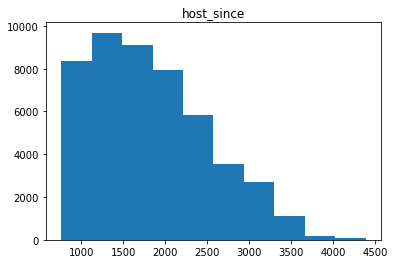

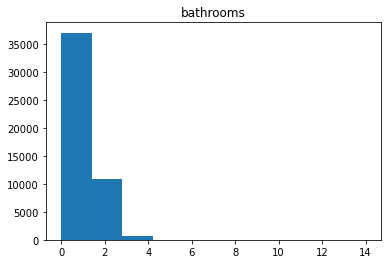

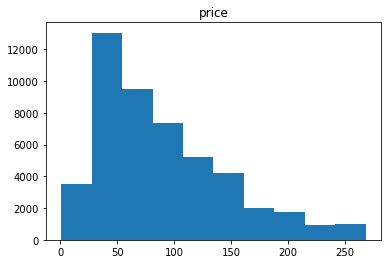

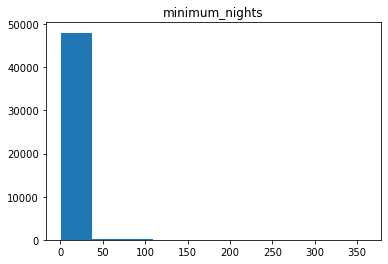

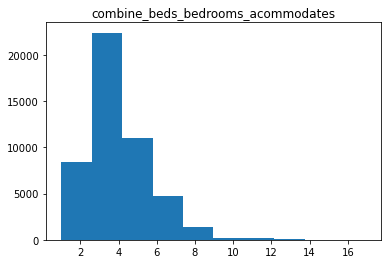

In [67]:
# Histograms of all vars with power transformation BoxCox

# set vars to check
check_vars = ['host_since', 'bathrooms',
       'price', 'minimum_nights',
       'combine_beds_bedrooms_acommodates',
    ]

# For loop on showing separate histograms per item
i = 0
for x in check_vars:
    # set data
    data = df_model_merged[x]
    
    # plot
    plt.figure(i)
    plt.title(x)
    plt.hist(data)
    print(plt.figure(i))
    
    # iterate 
    i = i + 1
    



In [90]:
# list of variables that need to be transformed to fit a normal distribution
to_check_vars = ['price','bathrooms','minimum_nights', 'combine_beds_bedrooms_acommodates']

# Boxcox transform and check outputs

0.10428900571030293
Figure(432x288)
-1.5114702702819813
Figure(432x288)
-1.0725863839858
Figure(432x288)
-1.2582039253556687
Figure(432x288)


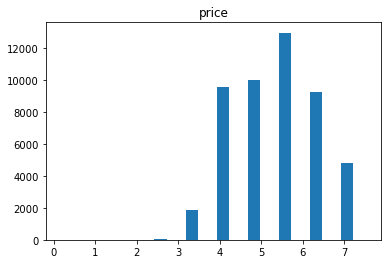

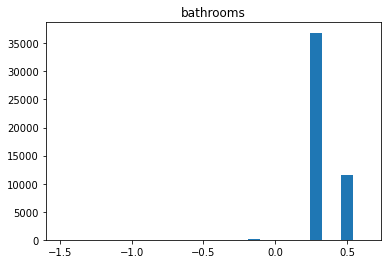

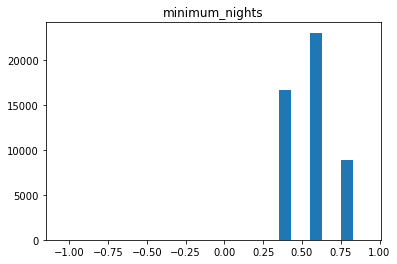

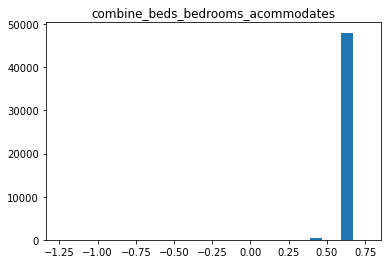

In [91]:
# For loop on showing separate histograms per item
i = 0
for x in to_check_vars:
    plt.figure(i)
    plt.title(x)
    
    # power transform
    data = df_model_merged[x] + 1
    data = boxcox(data)
    
    #print the boxcox lambda value
    print(data[1])
    
    #plot the graph
    plt.hist(data)
    print(plt.figure(i))
    
    #increment the counter
    i = i + 1

# Mark variables that can fit a normal distribution and get rid a few others

In [102]:
# variables to keep and boxcox transform 
boxcox_vars = ['price', 'combine_beds_bedrooms_acommodates']


# variables to drop
to_drop = ['bathrooms','minimum_nights']

In [98]:
#drop variables
df_model_merged = df_model_merged.drop(to_drop,axis=1)

KeyError: "['bathrooms' 'minimum_nights'] not found in axis"

# Boxcox transform needed variables

In [99]:
# create boxcox in dataframe function
def create_boxcox_df(df, boxcox_vars):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    boxcox_vars - list of strings that are associated with selected boxcox columns
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as boxcox columns
            2. removes all the original columns in boxcox_vars
            3. boxcox transforms for each of the boxcox columns in boxcox_vars
            4. returns df
            5. returns list of lambda values for maxlog()
    '''
    #iniate empty list
    lambda_list = list()
    
    #start for loop
    for col in boxcox_vars:
        try:
            # for each var boxcox transform
            data = df[col] +1
            data = boxcox(data)
            
            #lambda list append
            lambda_list.append(data[1])
            
            #create dataframe from array
            df_insert = pd.DataFrame(data[0],columns = [col],index = df_model_merged.index)
            
            #concat dataframes
            df = pd.merge(df_insert,df.drop(col, axis=1), right_index=True, left_index=True)

            
        except:
            continue
    return df, lambda_list

In [103]:
# apply to dataframe
df_model_merged, lambda_list = create_boxcox_df(df_model_merged,boxcox_vars=boxcox_vars)


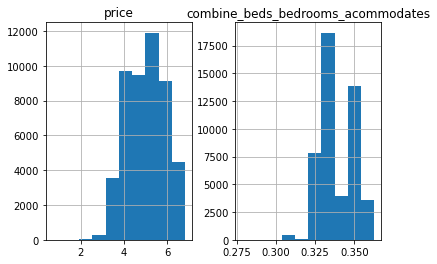

None


In [104]:
# histograms of the variables
df_hist = df_model_merged[boxcox_vars]

df_hist.hist()
print(plt.show())

# Standardization with StandardScaler

In [107]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler

# take all the variables that we want to standardize 
scaler_vars = ['combine_beds_bedrooms_acommodates']


# initiate standardscaler and apply to data
sc = StandardScaler()
scaled_array = sc.fit_transform(df_model_merged[scaler_vars])

# create new dataframe with scaled variables
df_model_scaled = pd.DataFrame(scaled_array, columns = scaler_vars, index = df_model_merged.index)

# merge them all back together
df_model_merged = pd.merge(df_model_scaled,df_model_merged.drop(scaler_vars,axis=1), right_index=True, left_index=True)

#print(df_model_merged.describe())

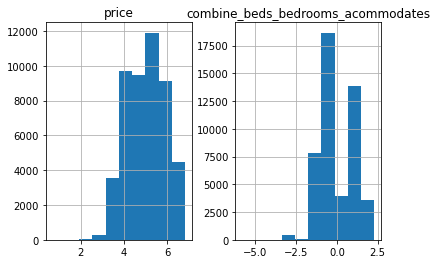

None


In [108]:
# histograms of the variables
df_hist = df_model_merged[boxcox_vars]

df_hist.hist()
print(plt.show())

# Look at all adapted distributions

<function matplotlib.pyplot.show(close=None, block=None)>

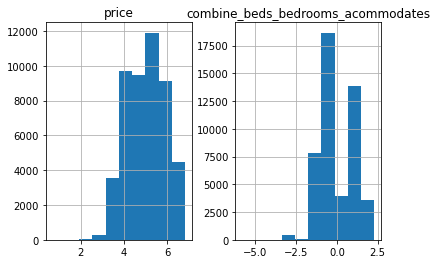

In [109]:
# histograms of the variables
df_hist = df_model_merged[boxcox_vars]

df_hist.hist()
plt.show



# Check for Multicollinearity

<AxesSubplot:>

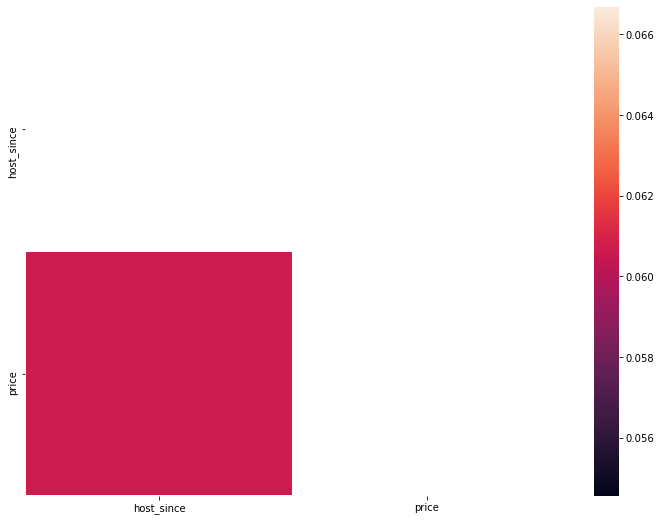

In [111]:
num_vars = ['host_since','price']

#df_plot = df_model_merged.select_dtypes(include=[np.number])
df_plot = df_model_merged[num_vars]

matrix = np.triu(df_plot.corr())

plt.figure(figsize=(12, 9))
sns.heatmap(df_plot.corr(), annot=False, mask=matrix, linewidths=.5, fmt='.1f')

# Take out variables where needed to avoid multicollinearity

# Modeling

* Implement Sklearn Linear Regression
* Refine with some PolyNomial Features
* Implement Sklearn RandomForestRegressor
* Implement Statsmodels OLS
* Implement H2O AutoML


In [112]:
def fit_linear_mod(df, response_col, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    This function should:
    1. Split your data into an X matrix and a response vector y
    2. Create training and test sets of data
    3. Instantiate a LinearRegression model with normalized data
    4. Fit your model to the training data
    5. Predict the response for the training data and the test data
    6. Obtain an rsquared value for both the training and test data
    '''

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds, y_train_preds

In [131]:
df_model_merged.columns

Index(['combine_beds_bedrooms_acommodates', 'price', 'host_since',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'is_location_exact', 'bed_type', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'has_tv', 'has_fireplace', 'has_kitchen', 'has_family_friendly',
       'has_host_greeting', 'has_24hrs_checkin', 'has_breakfast', 'has_pets',
       'has_dishwasher', 'has_private_entrance', 'has_patio_balcony',
       'has_self_checkin', 'has_workspace', 'has_bathtub', 'has_longterm',
       'has_parking', 'has_garden'],
      dtype='object')

In [120]:
df_model_merged = df_model_merged.drop(["neighbourhood_cleansed"],axis=1)
df_model_merged = df_model_merged.drop(["room_type"],axis=1)
df_model_merged = df_model_merged.drop(["property_type"],axis=1)
df_model_merged = df_model_merged.drop(["bed_type"],axis=1)
df_model_merged = df_model_merged.drop(["cancellation_policy"],axis=1)

In [139]:
df_model_merged["cancellation_policy"]

66                          flexible
67       strict_14_with_grace_period
68                          flexible
69       strict_14_with_grace_period
70                          moderate
                    ...             
51809                       moderate
51810                       flexible
51812                       flexible
51813                       flexible
51814                       flexible
Name: cancellation_policy, Length: 48524, dtype: object

# Use dataframe before preprocessing

In [141]:

#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds, y_train_preds = fit_linear_mod(df_model_merged, 'price')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

# The coefficients
#print('Coefficients: \n', lm_model.coef_)

# print RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_preds)))

The rsquared on the training data was 0.46840299651949824.  The rsquared on the test data was 0.47158432772624126.
Root Mean Squared Error: 0.6378258183840262


# Use dataframe after preprocessing

In [142]:
# after preprocessing

#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds, y_train_preds = fit_linear_mod(df_model_merged, 'price')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

# The coefficients
#print('Coefficients: \n', lm_model.coef_)

# print RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_preds)))

The rsquared on the training data was 0.46840299651949824.  The rsquared on the test data was 0.47158432772624126.
Root Mean Squared Error: 0.6378258183840262


# PCA analysis


In [143]:
# Applying PCA function on training 
from sklearn.decomposition import PCA 
  
pca = PCA()
  
X_train = pca.fit_transform(X_train) 
  
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.99992542e-01 2.22520967e-06 6.17965543e-07 5.08942195e-07
 4.38259507e-07 4.14176390e-07 3.83839767e-07 3.57375568e-07
 3.44999477e-07 3.15114800e-07 2.82676167e-07 2.59521116e-07
 2.27509166e-07 1.78473853e-07 1.47602383e-07 1.38315663e-07
 1.33761582e-07 1.25558825e-07 1.16709772e-07 8.05069861e-08
 6.85636488e-08 5.13260073e-08 2.96706007e-08 6.37791480e-09
 5.30423275e-09]


# Implement Statsmodels OLS

In [145]:
#import statsmodel library
import statsmodels.api as sm

#set response column and df to use
response_col = 'price'
df_to_use_ols = df_model_merged

# set X matrix and y 
X = df_to_use_ols.drop(response_col, axis=1)
X = sm.add_constant(X)
y = df_to_use_ols[response_col]

# fit and predict
est = sm.OLS(y.astype(float), X.astype(float)).fit()
ypred = est.predict(X)

# evaluate
rmse = np.sqrt(mean_squared_error(y, ypred))
print(rmse)

# show stats summary
est.summary()


0.6374717747524319


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     1717.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:20:52   Log-Likelihood:                -47005.
No. Observations:               48524   AIC:                         9.406e+04
Df Residuals:                   48498   BIC:                         9.429e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 5.1218      0.061     84.205      0.000       5.003       5.241
combine_beds_bedrooms_acommodates     0.5052      0.003    155.055      0.000       0.499       0.512
host_since                         2.685e-05   4.76e-06      5.643      0.000    1.75e-05    3.62e-05
host_is_superhost                    -0.0342      0.009     -3.830      0.000      -0.052      -0.017
host_has_profile_pic                 -0.1801      0.058     -3.086      0.002      -0.294      -0.066
host_identity_verified               -0.0401      0.007     -5.812      0.000      -0.054      -0.027
is_location_exact                    -0.0208      0.006     -3.498      0.000      -0.032      -0.009
require_guest_profile_picture         0.0253      0.048      0.530      0.596      -0.068       0.119
require_guest_phone_verification      0.1813      0.034      5.347      0.000       0.115       0.248
has_tv                               -0.1329      0.015     -9.086      0.000      -0.162      -0.104
has_fireplace                         0.1319      0.012     11.022      0.000       0.108       0.155
has_kitchen                           0.0771      0.011      6.962      0.000       0.055       0.099
has_family_friendly                   0.0938      0.007     13.969      0.000       0.081       0.107
has_host_greeting                    -0.0471      0.007     -6.330      0.000      -0.062      -0.033
has_24hrs_checkin                     0.1258      0.016      7.885      0.000       0.094       0.157
has_breakfast                        -0.0580      0.008     -7.258      0.000      -0.074      -0.042
has_pets                             -0.2329      0.018    -12.661      0.000      -0.269      -0.197
has_dishwasher                        0.2864      0.009     31.998      0.000       0.269       0.304
has_private_entrance                  0.0927      0.007     12.834      0.000       0.079       0.107
has_patio_balcony                    -0.0443      0.011     -4.085      0.000      -0.066      -0.023
has_self_checkin                     -0.0354      0.008     -4.247      0.000      -0.052      -0.019
has_workspace                         0.0917      0.006     14.202      0.000       0.079       0.104
has_bathtub                          -0.0169      0.011     -1.477      0.140      -0.039       0.006
has_longterm                          0.0934      0.008     12.057      0.000       0.078       0.109
has_parking                          -0.2362      0.008    -31.386      0.000      -0.251      -0.221
has_garden                           -0.2685      0.011    -24.996      0.000      -0.290      -0.247
==============================================================================
Omnibus:                      330.934   Durbin

# Implement RandomForestRegressor

In [146]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)

response_col = 'price'
df_rfr_to_use = df_model_merged

X = df_rfr_to_use.drop(response_col, axis=1)
y = df_rfr_to_use[response_col]
regr.fit(X, y)
modelPred = regr.predict(X)

print("The R2 score: ",regr.score(X,y))

print("Number of predictions:",len(modelPred))

meanSquaredError=mean_squared_error(y, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = np.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)


The R2 score:  0.4373701698387027
Number of predictions: 48524
MSE: 0.431002988388441
RMSE: 0.6565081784627218


In [166]:
regr.predict_proba(X)

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

# Implement H2O AutoML solution

In [147]:
#https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
# tutorial: https://github.com/h2oai/h2o-tutorials/blob/master/h2o-world-2017/automl/Python/automl_binary_classification_product_backorders.ipynb

import h2o
from h2o.automl import H2OAutoML
h2o.init()

df_h2o_to_use = df_model_merged

# Identify predictors and response
x = df.columns.tolist()
y = "price"
x = x.remove(y)

df_model_h2o = h2o.H2OFrame(df_h2o_to_use)


ModuleNotFoundError: No module named 'h2o'

In [52]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=df_model_h2o)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200625_003646,0.895009,0.946049,0.895009,0.738556,0.091517
StackedEnsemble_BestOfFamily_AutoML_20200625_003646,0.895997,0.946571,0.895997,0.739257,0.0915679
GBM_grid__1_AutoML_20200625_003646_model_1,0.900758,0.949083,0.900758,0.742087,0.0918195
GBM_1_AutoML_20200625_003646,0.901634,0.949544,0.901634,0.742309,0.0919484
GBM_3_AutoML_20200625_003646,0.902059,0.949768,0.902059,0.742114,0.0919485
GBM_2_AutoML_20200625_003646,0.903343,0.950444,0.903343,0.742069,0.0919694
GBM_5_AutoML_20200625_003646,0.906222,0.951957,0.906222,0.742408,0.092332
XGBoost_grid__1_AutoML_20200625_003646_model_3,0.906398,0.952049,0.906398,0.744102,0.0921863
XGBoost_grid__1_AutoML_20200625_003646_model_4,0.908583,0.953196,0.908583,0.744957,0.0922579
GBM_grid__1_AutoML_20200625_003646_model_2,0.912297,0.955143,0.912297,0.746437,0.0924925
